In [1]:
from krwordrank.word import KRWordRank
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline
import pickle
import pandas as pd
import regex as re
import numpy as np

In [2]:
def clean_reivew(review):
    review = ''.join(re.compile('[가-힣.!? ]').findall(review))
    review = re.sub('\n', ' ', review)
    review = re.sub(r'\!+', '!', review)
    review = re.sub(r'\?+', '?', review)
    review = re.sub(r'\.+', '.', review)
    review = re.sub(r'\([^)]*\)', '', review)    # 괄호 안 내용 삭제
    review = re.sub(r'\[[^)]*\]', '', review)    # 대괄호 안 내용 삭제
    review = re.findall('.*?[.!\?]', review)
    return [line.strip() for line in review if len(line.strip()) > 1]

In [67]:
reviews = pd.read_excel('팜엔탑.xlsx')

In [68]:
bad_reviews = reviews[reviews['맛'] == 3]['리뷰'].values

In [69]:
wordrank_extractor = KRWordRank(
    min_count = 1, # 단어의 최소 출현 빈도수 (그래프 생성 시)
    max_length = 10, # 단어의 최대 길이
    verbose = True
    )

keywords, _, _ = wordrank_extractor.extract(bad_reviews)

for word, r in sorted(keywords.items(), key=lambda x:x[1], reverse=True)[:30]:
    print('%8s:\t%.4f' % (word, r))

scan vocabs ... 
num vocabs = 3619
done = 10
     좋아요:	15.4443
      먹고:	15.1701
     비타민:	8.2175
      같이:	7.3943
      너무:	6.6886
      조금:	6.4265
     꾸준히:	5.9641
     크기가:	5.7049
      하루:	5.6116
      만성:	5.3960
      먹기:	5.3560
      천연:	5.3437
     재구매:	5.3253
      구매:	4.8801
      알약:	4.4669
     있어서:	4.4247
      아주:	4.3025
      좋은:	4.0439
     합니다:	4.0180
      가격:	3.9616
     부모님:	3.9359
     이번에:	3.8672
      먹어:	3.8671
    개월치라:	3.7807
      느낌:	3.6876
      나름:	3.6814
     약통도:	3.6606
      효과:	3.5524
      많이:	3.4084
      알씩:	3.3988


In [2]:
reviews = pd.read_excel('200428_향_with_rating.xlsx')

In [3]:
good_reviews = reviews[reviews['구분'] == 3]['리뷰'].values

In [18]:
wordrank_extractor = KRWordRank(
    min_count = 1, # 단어의 최소 출현 빈도수 (그래프 생성 시)
    max_length = 10, # 단어의 최대 길이
    verbose = True
    )

keywords, _, _ = wordrank_extractor.extract(good_reviews)

for word, r in sorted(keywords.items(), key=lambda x:x[1], reverse=True)[:20]:
    print('%8s:\t%.4f' % (word, r))

scan vocabs ... 
num vocabs = 46708
done = 10
      향이:	240.9547
      향도:	237.9761
      너무:	186.4935
     좋아요:	171.5714
      좋고:	140.1866
      냄새:	79.8638
      향기:	76.9966
      사용:	66.2838
      많이:	64.6955
      정말:	55.7340
      진짜:	54.0551
      구매:	46.9820
      머리:	45.3965
      오래:	44.2058
     좋네요:	41.1653
      이거:	39.3593
      샴푸:	39.2657
      아주:	38.8994
      다른:	38.3198
      ㅎㅎ:	37.4850


In [45]:
with open('../LDA/Legacy/lda_legacy_datasets/스킨케어.pkl', 'rb') as f:
    reviews = pickle.load(f)

In [46]:
reviews

,리뷰,rating
0,원래 스킨을 안 쓰다가 화장솜이랑 같이 사서 세수후에 얼굴을 닦는데 화장솜에 얼굴에...,5.0
1,항상 사용하는 제품! 2년 정도 쓴 것 같은데 안 좋은 점을 아직도 찾지 못했네요~...,5.0
2,제가 민감성피부인데요 쓰고나서 트러블이나 얼굴 빨게지는 증상 전혀없고 좋아요.,5.0
3,이거 좋더믄 말은 많이 들어서 처음 사봐ㅛ는데 엄청 순한게 느껴지고 닦토로 쓰는데 ...,5.0
4,후기가 좋아 구입했고 사용해봐야 알 것 같습니다.^^,5.0
...,...,...
3848696,재구매했어요. 오일 섞인 미스트를 선호 하는데 이것만한건 없는듯. 다 쓰면 또 구매...,4.0
3848697,광채미스트란 말에 낚였네요 광채는 어디서 나오는지 알수가 없네요..,1.0
3848698,오일이 너무 적은것같긴 하지만 가을철 사용하기에 딱이에요.,5.0
3848699,좋아요~~또 시킬려구요,5.0


In [47]:
normal_reviews = reviews['리뷰'].sample(100000).values

In [48]:
cleaning_reivew = []
for review in normal_reviews:
    temp_list = []
    
    temp_review = clean_reivew(review)
    
    if(len(temp_review) > 0):
        temp_review = ' '.join(temp_review)
        temp_list.append(temp_review)
        #print(temp_list)
        
        cleaning_reivew.extend(temp_list)

In [49]:
normal_reviews[0]

'좋은 가격에 구매했습니다. 닦토로 추천합니다!'

In [50]:
cleaning_reivew[0]

'좋은 가격에 구매했습니다. 닦토로 추천합니다!'

In [63]:
wordrank_extractor = KRWordRank(
    min_count = 1, # 단어의 최소 출현 빈도수 (그래프 생성 시)
    max_length = 10, # 단어의 최대 길이
    verbose = True
    )

keywords, _, _ = wordrank_extractor.extract(cleaning_reivew)

for word, r in sorted(keywords.items(), key=lambda x:x[1], reverse=True)[:30]:
    print('%8s:\t%.4f' % (word, r))

scan vocabs ... 
num vocabs = 308992
done = 10 Early stopped.
      너무:	793.4336
      좋아:	721.7735
      피부:	613.9890
      사용:	576.8504
      배송:	495.1073
      제품:	466.5835
      많이:	466.4324
      구매:	425.6413
      아직:	411.1330
      정말:	384.9271
      항상:	345.3935
      촉촉:	341.6839
      좋은:	329.1974
      쓰고:	281.4365
      계속:	267.8256
      바르:	253.6306
      아주:	243.7241
      만족:	235.1468
     트러블:	231.0131
      가격:	228.5427
     꾸준히:	226.9734
      진짜:	225.7373
      효과:	225.5741
      처음:	220.2992
      다른:	213.8829
      수분:	211.7479
      느낌:	209.0629
      같아:	208.3970
      샘플:	207.4489
      그냥:	198.2244


In [81]:
with open('bad_score_list', 'rb') as f:
    bad_score_list= pickle.load(f)

In [82]:
with open('good_score_list', 'rb') as f:
    good_score_list= pickle.load(f)

In [85]:
def clean_score_list(score_list):
    temp = [[''.join(re.findall('[가-힣]',score[0])), score[1]] for score in score_list if score[1] != 0 and len(score[0]) >= 2]
    temp = [score for score in temp if len(score[0]) != 0]
    return temp

In [86]:
bad_score_list = clean_score_list(bad_score_list)

In [87]:
good_score_list = clean_score_list(good_score_list)

In [103]:
df = pd.DataFrame(good_score_list, columns=['token', 'score'])

In [104]:
avg_score_list = [[token, df[df['token'] == token]['score'].mean() ] for token in df['token'].unique()]

In [105]:
weight_dic = dict(avg_score_list)

In [106]:
weight_dic

{'향기': 7.748400642789267,
 '마음': 18.920625725089206,
 '디자인': 8.632753036793904,
 '제품': 9.268297820063143,
 '겨울': 3.7684714218644007,
 '사용': 9.880265835117436,
 '샤워': 5.997526419859016,
 '느낌': 3.2736512541933385,
 '해피': 15.96081655578013,
 '바스': 5.350478899406789,
 '베이비파우더': 7.188776666018678,
 '흡수': 23.914096780193827,
 '향도': 7.3978201212029155,
 '땀내': 0.8775629066459588,
 '커버': 0.9304770875676521,
 '발림': 8.669523855933454,
 '남자': 5.734277323789497,
 '부결': 11.426492844982832,
 '아이': 10.480147359243887,
 '가격': 12.875362627474367,
 '보습': 18.974729487499317,
 '전체': 15.489353561079293,
 '거품': 12.222719550251538,
 '세정력': 21.314046068267462,
 '수분': 15.33787585438144,
 '냄새': 35.411328382002715,
 '여친': 27.74661636289423,
 '구매': 6.010130141969939,
 '만족': 7.5841781551548255,
 '가성': 5.220981867185749,
 '비부': 3.07238581173843,
 '향수': 7.252785728349502,
 '가요': 15.980605652246968,
 '신랑': 12.813687938626073,
 '상품': 3.4829027030443758,
 '용기': 15.588936550154894,
 '불편': 13.413507898177574,
 '건조': 7.815

In [73]:
import math

In [74]:
for keyword in keywords:
    if(keyword in weight_dic):
        keywords[keyword] = keywords[keyword]*weight_dic[keyword]


In [107]:
keywords

{'너무': 2243.348552464927,
 '좋아': 1684.4913446146843,
 '피부': 314.7422762710685,
 '사용': 585.6767917799884,
 '배송': 392.64529790887303,
 '제품': 600.0140769472029,
 '많이': 1481.4979749097163,
 '구매': 237.51211401177682,
 '아직': 1.667754633860618,
 '정말': 904.5755796754719,
 '항상': 1273.9511918387109,
 '촉촉': 9.575277158117382,
 '좋은': 303.58539046142704,
 '쓰고': 334.7335098660216,
 '계속': 1072.5804545671674,
 '바르': 172.972196981323,
 '아주': 296.6361985703301,
 '만족': 99.7668788379747,
 '트러블': 0.32893631576103677,
 '가격': 249.37477066575457,
 '꾸준히': 54.926527144392466,
 '진짜': 537.7249258942817,
 '효과': 82.39610561218792,
 '처음': 351.36493619966984,
 '다른': 145.31402825180217,
 '수분': 0.8183863000850458,
 '느낌': 84.8222192658255,
 '같아': 141.0343668755254,
 '샘플': 207.4489073645707,
 '그냥': 408.2944533122593,
 '얼굴': 6.632073202886187,
 '일단': 319.4628789287105,
 '조금': 59.762752954675314,
 '저는': 0.029314992526526605,
 '재구매': 94.79265968196347,
 '이거': 15.722982614346126,
 '빠르고': 117.98776767124424,
 '완전': 97.4527143

In [30]:
keywords = dict([[k,v] for k,v in keywords.items()][10:])

In [92]:
font_path = 'NanumSquareRoundB.ttf'

In [95]:
wordcloud = WordCloud(
    font_path = font_path,
    width = 800,
    height = 800,
    background_color="white"
)
wordcloud = wordcloud.generate_from_frequencies(weight_dic)

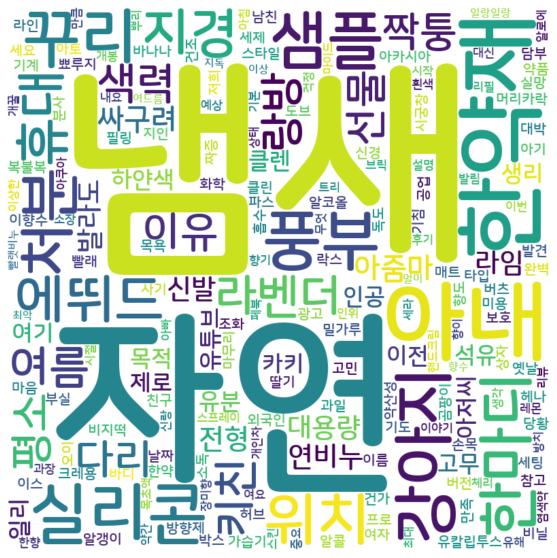

In [96]:
array = wordcloud.to_array()
fig = plt.figure(figsize=(10, 10))
plt.imshow(array, interpolation="bilinear")
plt.axis("off")
plt.show()

In [101]:
wordcloud = WordCloud(
    font_path = font_path,
    width = 800,
    height = 800,
    background_color="white"
)
wordcloud = wordcloud.generate_from_frequencies(weight_dic)

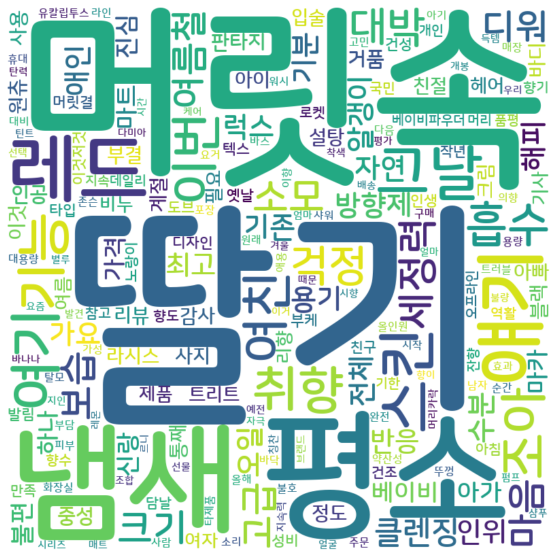

In [102]:
array = wordcloud.to_array()
fig = plt.figure(figsize=(10, 10))
plt.imshow(array, interpolation="bilinear")
plt.axis("off")
plt.show()